In [57]:
%matplotlib ipympl
import json
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


# JSON files -> lists of dictionaries
with open('./ui_all_q_p.json') as json_file:
    ui_all_q_p = json.load(json_file)
    
with open('./ui_all_q.json') as json_file:
    ui_all_q = json.load(json_file)

In [58]:
# [{}] -> [[]] 

ui_data = []

for d in ui_all_q_p:   
    for x,y in d.items() :
        name = x
        f1_mean = y['f1_mean']
        roc_mean = y['roc_mean']
        precision_mean = y['precision_mean']
        recall_mean = y['recall_mean']
        ui_data.append(['ui_all_q_p', name,f1_mean, roc_mean, precision_mean, recall_mean])

for d in ui_all_q:   
    for x,y in d.items() :
        name = x
        f1_mean = y['f1_mean']
        roc_mean = y['roc_mean']
        precision_mean = y['precision_mean']
        recall_mean = y['recall_mean']
        ui_data.append(['ui_all_q', name,f1_mean, roc_mean, precision_mean, recall_mean])

In [59]:
# [[]] -> dataframe
df_ui_data = pd.DataFrame(ui_data, columns=['QuestionSet', 'Model', 'f1', 'roc_auc', 'precision', 'recall'])

In [60]:
df_ui_data['precision'].describe()

count    136.000000
mean       0.160986
std        0.110955
min        0.000000
25%        0.094006
50%        0.155267
75%        0.243818
max        0.383056
Name: precision, dtype: float64

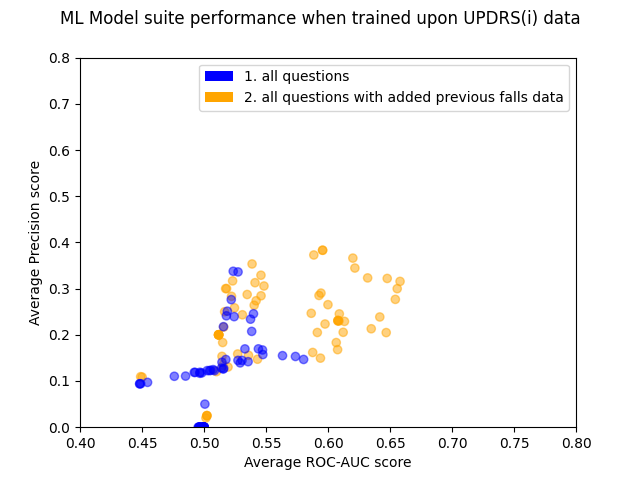

In [61]:
# UPDRS I plot

colors = {'ui_all_q':'blue', 'ui_all_q_p':'orange'}

fig = plt.figure()
ax = fig.add_subplot(111)
# ax2 = fig.add_subplot(122)

# plot 1
# ax.set_title("ROC_AUC scores vs Precision scores")
ax.scatter(df_ui_data['roc_auc'], df_ui_data['precision'], c=df_ui_data['QuestionSet'].map(colors), label=['ui_all_q','ui_all_q_p'], alpha=0.5)
ax.set_xlim([0.4,0.8])
ax.set_ylim([0,0.8])
plt.ylabel("Average Precision score")
plt.xlabel("Average ROC-AUC score")

classes = ['1. all questions','2. all questions with added previous falls data']
class_colours = ['blue','orange']
recs = []
for i in range(0,len(class_colours)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=class_colours[i]))
ax.legend(recs,classes,loc=1)

# plot 2
# ax2.set_title("Precision scores vs Recall scores")
# ax2.scatter(df_ui_data['precision'], df_ui_data['recall'], c=df_ui_data['QuestionSet'].map(colors))
# ax2.set_xlim([0,1])
# ax2.set_ylim([0,1])



plt.suptitle("ML Model suite performance when trained upon UPDRS(i) data")
plt.show()

In [65]:
# df_ui_data.query("roc_auc > 0.65 and precision > 3.0")
x = df_ui_data.sort_values('roc_auc', ascending=False)
x.head(n=20)
# General Observations for UPDRS I:
# Nothing worth getting excited about
# + PREV_SIGFALL out performs w/o


,QuestionSet,Model,f1,roc_auc,precision,recall
7,ui_all_q_p,GNB8,0.369253,0.658098,0.315594,0.462500
6,ui_all_q_p,GNB7,0.361496,0.655816,0.299888,0.473611
5,ui_all_q_p,GNB6,0.352239,0.654303,0.276705,0.495833
9,ui_all_q_p,GNB10,0.356217,0.647755,0.321984,0.429167
2,ui_all_q_p,GNB3,0.308354,0.646937,0.204792,0.630556
4,ui_all_q_p,GNB5,0.325529,0.641766,0.238597,0.518056
3,ui_all_q_p,GNB4,0.306731,0.634871,0.213066,0.551389
8,ui_all_q_p,GNB9,0.338688,0.631969,0.323138,0.394444
12,ui_all_q_p,LDA3,0.320626,0.621677,0.344502,0.323611
17,ui_all_q_p,LDA9,0.320077,0.620052,0.366017,0.312500
